In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import spdiags, lil_matrix
%matplotlib inline

### Problem 1

###### Numerically solve the heat equation with homogeneous boundary conditions. Run the simulation up to a final time of $t_f = 2$.
\begin{align*}
    u_t &= \mu \frac{\partial^2 u}{\partial x^2} \qquad \mu\in(0,1], &(x,t)\in(0,1)\times(0,\infty)\\
    u(0,t) &= 0 \qquad &t\in(0,\infty)\\
    u(1,t) &= 0 \qquad &t\in(0,\infty)\\
    u(x,0) &= \sin(\pi x) \qquad &x\in[0,1]
\end{align*}

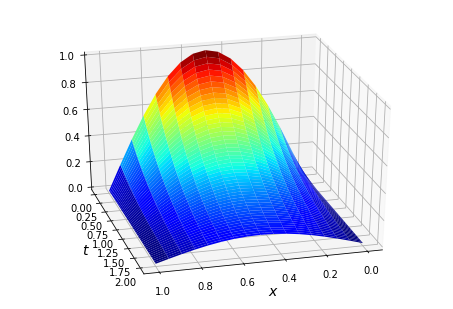

In [4]:
# ----------------------------------------------------------------
#                       INITIALIZATION
# ----------------------------------------------------------------
# Initialize the solution and temporal lists
# uv will store the solution at each time step
uv, tv = [], []
# Initialize the simulation parameters
mu = 0.1 # Diffusivity
N = 17   # Number of spatial points
# Construct the spatial grid, grid-spacing, and Laplacian stencil
x = np.linspace(0,1,N)
dx = (x[-1] - x[0])/(N-1)
L = np.array([1,-2,1])/dx**2
# Set the initial condition and intial time
u, t = np.sin(np.pi*x), 0.
# Append the solution and temporal lists
uv.append(np.array(u))
tv.append(np.array(t))
# Set the time step and final time
dt = 1e-3
tf = 2
# ----------------------------------------------------------------

# Run Euler's method
# * at each time step evaluation the Laplacian across the grid
# * neglect the boundary points in this case -- they're constant
# * employ Euler's method at each grid point

# While loop for time
while t <= tf:
    # For loop for space
    uold=u.copy()
    # PUT YOUR FOR LOOP HERE:
    for i in range(1,N-1):
        up=mu*L.dot(np.array([uold[i-1],uold[i],uold[i+1]]))
        # Euler's method at each u[k] -- update u
        u[i]=u[i]+dt*up
        # PUT YOUR EULER'S METHOD HERE
    # Update time
    t += dt
    # Append the solution and temporal lists
    uv.append(np.array(u))
    tv.append(t)
# Display the results in a spatial-temporal plot
uv=np.array(uv)
xx,tt = np.meshgrid(x,tv)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx,tt,uv,cmap='jet')
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$t$',size=14)
ax.view_init(elev=30,azim=75);

### Problem 2

###### The data for peak concentration of ?? is given at the times $[0,0.1,0.2,\ldots,0.9,1.0]$.
* Use the data to approximate the diffusivity.
* Assume that the concentration profile has the form $u(x,t) = e^{-\mu\pi^2 t}\sin(\pi x)$.
* The data has some experimental noise in it however.
* Run a simulation to determine the concentration profile at $t = 1.5$.

In [5]:
peak_con = np.array([ 1.00756725,  0.51221791,  0.4857212 ,  0.24611904,  0.13837283,
        0.09449781,  0.0730335 ,  0.03125524,  0.02533951, 0.02864094,
        0.01323236])
times=np.linspace(0,1,11)
mu=-np.log(peak_con)/np.pi**2
mu=mu[1:]
mu=mu/times[1:]
#print(mu)
mucrit=np.mean(mu)

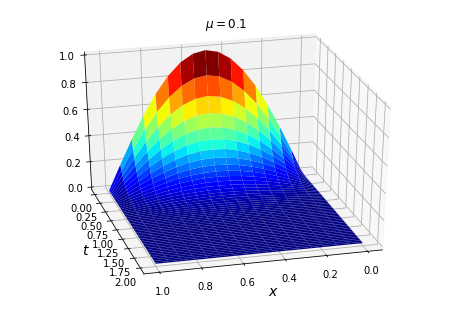

In [6]:
# ----------------------------------------------------------------
#                       INITIALIZATION
# ----------------------------------------------------------------
# Initialize the solution and temporal lists
# uv will store the solution at each time step
uv, tv = [], []
# Initialize the simulation parameters
mu = mucrit # Diffusivity
N = 17   # Number of spatial points
# Construct the spatial grid, grid-spacing, and Laplacian stencil
x = np.linspace(0,1,N)
dx = (x[-1] - x[0])/(N-1)
L = np.array([1,-2,1])/dx**2
# Set the initial condition and intial time
u, t = np.sin(np.pi*x), 0.
# Append the solution and temporal lists
uv.append(np.array(u))
tv.append(np.array(t))
# Set the time step and final time
dt = 1e-3
tf = 2
# ----------------------------------------------------------------

# Run Euler's method
# * at each time step evaluation the Laplacian across the grid
# * neglect the boundary points in this case -- they're constant
# * employ Euler's method at each grid point

# While loop for time
while t <= tf:
    # For loop for space
    uold=u.copy()
    # PUT YOUR FOR LOOP HERE:
    for i in range(1,N-1):
        up=mu*L.dot(np.array([uold[i-1],uold[i],uold[i+1]]))
        # Euler's method at each u[k] -- update u
        u[i]=u[i]+dt*up
        # PUT YOUR EULER'S METHOD HERE
    # Update time
    t += dt
    # Append the solution and temporal lists
    uv.append(np.array(u))
    tv.append(t)
# Display the results in a spatial-temporal plot
uv=np.array(uv)
xx,tt = np.meshgrid(x,tv)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx,tt,uv,cmap='jet')
ax.set_title('$\mu = 0.1$')
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$t$',size=14)
ax.view_init(elev=30,azim=75);

### Problem 3


###### Construct a second-order accurate differentiation matrix for the 1D Laplacian with constant boundary conditions.
* Use spdiags and lil_matrix
* Assume N = 33
* Assume a grid x = np.linspace(-1,1,33)
* For the purposes of this assignment wipe out the sparsity of this matrix by incorporating the line D = D@np.eye(N,N)

In [7]:
N = 33
x = np.linspace(-1,1,N)
h = (x[-1] - x[0])/(N - 1)
# Construct the ones array for the tridiagonals
e = np.ones(N)
#Construct stencil weights
stencil = np.array([e, -2.*e, e]) # Replace with second derivative stencil
#Centered difference stencils are located on the off-diagonals
diag_array = np.array([-1,0,1]) # Replace with the array of the indices
D = spdiags(stencil,diag_array,N,N) # Replace with spdiags statement
D = lil_matrix(D) # Convert to lil_matrix
# First and last rows are [1,0,0,...,0,0] and [0,0,0,...,0,1] respectively
D = D@np.eye(N,N)/h**2
D[0] = np.eye(1,N)
D[-1] = np.flip(np.eye(1,N))
# Wipe sparse construction for this assignment
#D = D@np.eye(N,N)/h**2
print(D)

[[   1.    0.    0. ...    0.    0.    0.]
 [ 256. -512.  256. ...    0.    0.    0.]
 [   0.  256. -512. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -512.  256.    0.]
 [   0.    0.    0. ...  256. -512.  256.]
 [   0.    0.    0. ...    0.    0.    1.]]


### Problem 4

###### Numerically solve Poisson's equation with homogeneous boundary conditions.
\begin{align*}
    \frac{\partial^2 u}{\partial x^2} &= -\pi^2\sin(\pi x) \qquad &x\in(-1,1)\\
    u(-1) &= 0\\
    u(1) &= 0
\end{align*}

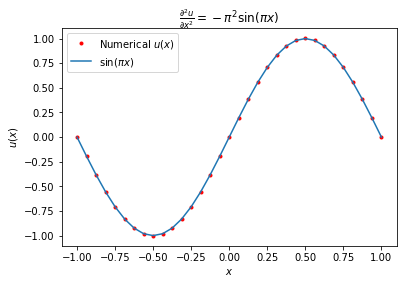

In [8]:
N = 33
x = np.linspace(-1,1,N)
h = (x[-1] - x[0])/(N - 1)
# Construct the ones array for the tridiagonals
e = np.ones(N)
#Construct stencil weights
stencil = np.array([e, -2.*e, e]) # Replace with second derivative stencil
#Centered difference stencils are located on the off-diagonals
diag_array = np.array([-1,0,1]) # Replace with the array of the indices
D = spdiags(stencil,diag_array,N,N) # Replace with spdiags statement
D = lil_matrix(D) # Convert to lil_matrix
# First and last rows are [1,0,0,...,0,0] and [0,0,0,...,0,1] respectively
D = D@np.eye(N,N)/h**2
D[0] = np.eye(1,N)
D[-1] = np.flip(np.eye(1,N))


f=np.array(-np.pi**2*np.sin(np.pi*x))

u=np.linalg.solve(D,f)
plt.plot(x,u,'r.',x,np.sin(np.pi*x));
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.title(r'$\frac{\partial^2 u}{\partial x^2}=-\pi^2\sin(\pi x)$')
plt.legend(['Numerical $u(x)$','$\sin(\pi x)$'])
plt.savefig('4.png')

### Problem 5


###### Numerically solve the Poisson equation with constant boundary conditions.
\begin{align*}
    \frac{\partial^2 u}{\partial x^2}+\lambda u &= f(x) \qquad &x\in(-1,1)\\
    u(-1) &= 0.808\\
    u(1) &= 0.449
\end{align*}
The right-hand side, $f(x)$, is given by the data below and the eigenvalue, $\lambda = 1.43$. Note that the boundary conditions are constants determined by the data from the right-hand side.

In [9]:
N = 128
x = np.linspace(-1,1,N)
h = (x[-1] - x[0])/(N - 1)
# Construct the ones array for the tridiagonals
e = np.ones(N)
#Construct stencil weights
stencil = np.array([e, -2.*e, e]) # Replace with second derivative stencil
#Centered difference stencils are located on the off-diagonals
diag_array = np.array([-1,0,1]) # Replace with the array of the indices
D = spdiags(stencil,diag_array,N,N) # Replace with spdiags statement
D = lil_matrix(D) # Convert to lil_matrix
# First and last rows are [1,0,0,...,0,0] and [0,0,0,...,0,1] respectively
D[0] = np.eye(1,N)
D[-1] = np.flip(np.eye(1,N))
D = D@np.eye(N,N)/h**2

# The matrix will have a different construction
# It will look similar to what you see when you solve eigenvalue problems
# A*v = lam*v becomes A*v - lam*v = 0 (0 vector) becomes (A - ??)v = 0
D = D + 1.43*np.identity(N)

In [10]:
f = np.array([ 3259.41444326,  1694.89938818, -1378.53681002,  1173.1198279 ,
       -1266.25396075,   319.69721702,   217.30615081,   470.93652841,
        3110.56139687, -6845.2644483 ,  4150.690575  ,  1513.14528554,
       -2404.97133686, -1689.37514356,  2309.74753714,  2643.59736638,
       -4946.89653543,  2016.61752547,  1613.04239346, -4529.39355082,
        2838.63426286,  2632.52865059, -3752.77642876,   494.61731379,
        3937.47401342, -7181.87281149,  4739.44345706,  1917.51192547,
       -3752.28347585,   970.29413898, -1593.79079116,  4106.38820152,
       -3389.56758124,   -53.25300473,  3011.0150852 , -3528.82186617,
        3374.61289885, -3217.50238703,  1652.65225646,  -711.99573371,
        2511.46496371, -4562.60716785,  2449.77582876,  -874.78824718,
        3413.4702101 , -2238.92004095, -1093.96837986,   731.54506747,
         862.02124873,  -292.32583521,  -511.54936347, -2263.66518466,
        4504.74315094, -3634.23414878,  2841.60546881,  -255.1930046 ,
       -3649.82143989,  2243.93925069,  1006.06200385, -2369.27053933,
        2016.80752946,  -613.66294458,  4006.05850555, -7221.57575767,
        4680.89749546,   347.59597445, -1550.48853415,   701.4366281 ,
       -2866.73146263,  4237.24159858, -4944.09887648,  2746.72510714,
        1906.30323981,  -712.52453719, -3581.71532474,  3631.58006046,
       -1598.79550799,  1179.65616295, -2447.9729306 ,  2019.8065073 ,
        2289.53021914, -4070.29519287,  2435.73436366, -3874.32156862,
        4234.61623684, -1917.8194852 ,   530.4069265 ,  2734.5616189 ,
       -1964.64114696, -3941.37555156,  6531.61163638, -6485.46390717,
        3272.21153247,  3292.5915553 , -4135.47846899,  -165.95469805,
         528.78263729,  1206.69938173,   292.65954865, -1232.26797449,
       -2748.69354802,  6037.08249994, -4683.18114468,   550.54250288,
        4125.48511146, -6883.35608396,  5133.07800028, -2447.51265704,
        2922.2339147 ,  -926.58184645, -1134.44528022,  1062.48691215,
       -3997.23384288,  5345.00334988,  -840.08137085, -4685.13993409,
        5608.14531544, -3778.60008883,  4181.58669761, -3267.38045275,
         -36.90833455,   285.17467299,  1855.38301917, -2510.31651122,
        2184.387838  , -1273.46941837, -1790.08434625,  1813.09982896])

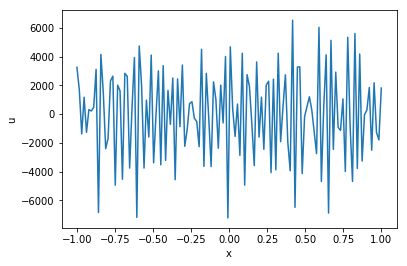

In [11]:
u=np.linalg.solve(D,f)
plt.plot(x,f);
plt.xlabel('x');
plt.ylabel('u');
plt.savefig('5.png')